In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')
print('imported libs ..!')


imported libs ..!


1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provideddata for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2.Build a predictive model to help Ultimate determine whether or not a user will be activein their 6th month on the system. Discuss why you chose your approach, whatalternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

3.Briefly discuss how Ultimate might leverage the insights gained from the model toimprove its long­ term rider retention (again, a few sentences will suffice).

In [2]:
with open('ultimate_challenge/ultimate_data_challenge.json') as f:
    ult_json = json.load(f)

In [3]:
ultimate_df = pd.DataFrame(ult_json)
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [6]:
ultimate_df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [7]:
#filling NAs

#fill missing values by  the mean 
ultimate_df['avg_rating_by_driver'] = ultimate_df['avg_rating_by_driver'].fillna(value=4.778158)

#fill missing values with median value
ultimate_df['avg_rating_of_driver'] = ultimate_df['avg_rating_of_driver'].fillna(value=4.601559)

In [8]:
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

In [9]:
current_date = ultimate_df['last_trip_date'].max()
current_date

Timestamp('2014-07-01 00:00:00')

In [10]:
# Active users are user if they took their last trip in preceding 30 days earlier than current date
ultimate_df['active'] = ultimate_df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
ultimate_df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [11]:
ultimate_df.active.value_counts()

0    31196
1    18804
Name: active, dtype: int64

In [12]:
activeuser_pc = 18804/(18804 + 31196 )
activeuser_pc

0.37608

only 37.6% of users are active users after a 6 month period

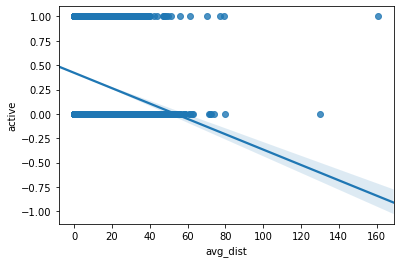

In [13]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['avg_dist'], fit_reg = True)

In [14]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.207939  6.238675
1       5.114788  4.615175

we can observe that as the average distance increases, the active users decline

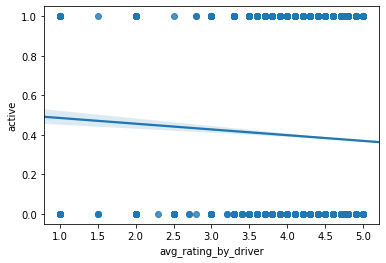

In [15]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['avg_rating_by_driver'], fit_reg = True)

In [16]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'avg_rating_by_driver':['mean','std']})

avg_rating_by_driver          
                       mean       std
active                               
0                  4.787415  0.503312
1                  4.762801  0.328175

We can observe that the average rating by driver for inactive users is more. This could be attributed to active users having more trip and so a lesser average

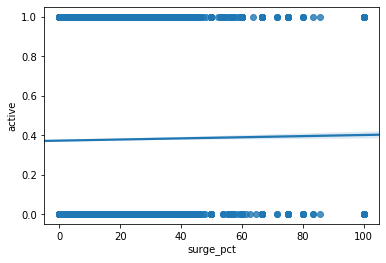

In [17]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['surge_pct'], fit_reg = True)

In [18]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'surge_pct':['mean','std']})

surge_pct           
            mean        std
active                     
0       8.666739  22.179139
1       9.152797  15.588704

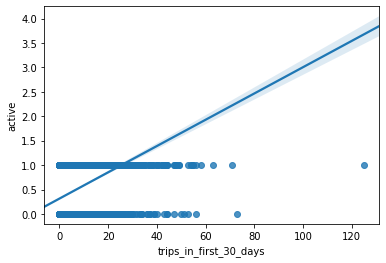

In [19]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['trips_in_first_30_days'], fit_reg = True)

In [20]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'trips_in_first_30_days':['mean','std']})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.658482  2.654222
1                    3.306318  4.986743

We can an obsever that active users took more trips in the first 30 days

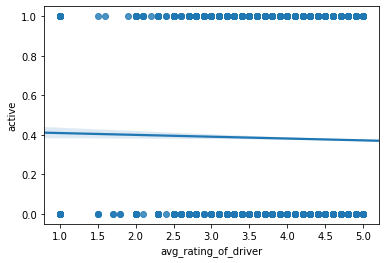

In [21]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['avg_rating_of_driver'], fit_reg = True)

In [22]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'avg_rating_of_driver':['mean','std']})

avg_rating_of_driver          
                       mean       std
active                               
0                  4.606309  0.591282
1                  4.593679  0.518319

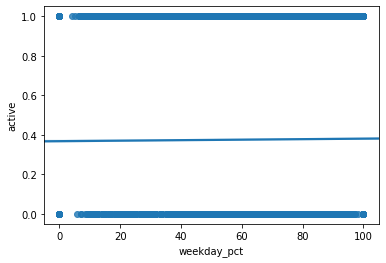

In [23]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['weekday_pct'], fit_reg = True)


In [24]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'weekday_pct':['mean','std']})

weekday_pct           
              mean        std
active                       
0        60.647032  40.982688
1        61.389034  29.487584

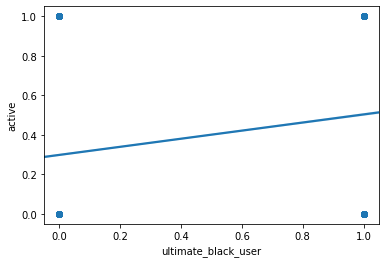

In [25]:
sns.regplot(y=ultimate_df['active'], x=ultimate_df['ultimate_black_user'], fit_reg = True)


In [26]:
pd.pivot_table(ultimate_df,index='active',aggfunc={'ultimate_black_user':['mean','std']})

ultimate_black_user          
                      mean       std
active                              
0                 0.299942  0.458240
1                 0.505052  0.499988

Probablity of an active user increases if he took a Ultimate Black in their first 30 days

### Check if any variables are correlated

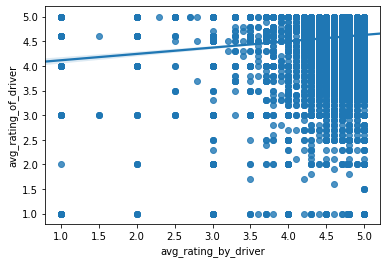

In [27]:
sns.regplot(y=ultimate_df['avg_rating_of_driver'], x=ultimate_df['avg_rating_by_driver'], fit_reg = True)

In [28]:
#transforming categorical features into numerical for predictive modeling
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Astapor',"King's Landing",'Winterfell'])
LE = preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])

LabelEncoder()

In [29]:
ultimate_df = ultimate_df.dropna()

In [30]:
ultimate_df['city_cat'] = le.transform(ultimate_df['city']) #transform the categorical data into number labels
ultimate_df['phone_cat'] = LE.transform(ultimate_df['phone'])

In [31]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_cat,phone_cat
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,2,0


In [32]:
ultimate_df = ultimate_df.drop(['city','phone'], axis=1)

In [33]:
ultimate_df["ultimate_black_user"] = ultimate_df["ultimate_black_user"].astype(int)

In [34]:
ultimate_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_cat,phone_cat
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,2,0


In [35]:
y =  ultimate_df['active']
X = ultimate_df[['trips_in_first_30_days','avg_dist','ultimate_black_user','city_cat',
                 'phone_cat','avg_rating_by_driver','avg_rating_of_driver']]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6597 1153]
 [2722 1929]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      7750
           1       0.63      0.41      0.50      4651

    accuracy                           0.69     12401
   macro avg       0.67      0.63      0.64     12401
weighted avg       0.68      0.69      0.67     12401



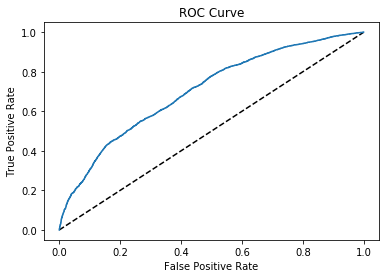

In [38]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = lr.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(lr, X, y, cv = 5,scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7032225327886477
AUC scores computed using 5-fold cross-validation: [0.71350063 0.71424482 0.7046098  0.7178865  0.72021303]


In [40]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
lr_ = LogisticRegression()
lr_cv = GridSearchCV(lr_, param_grid, cv=5)

lr_cv.fit(X,y)

print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.6949237964680268


In [41]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [43]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.88%


Text(0, 0.5, 'Feature Importance Score')

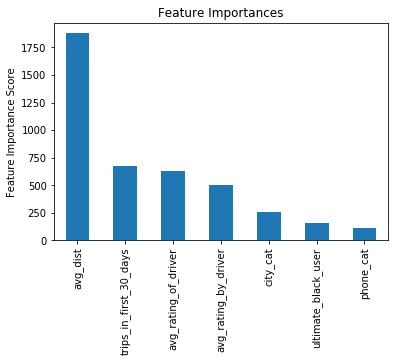

In [44]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Conclusion

The most significant factor affecting the users is the avg_dist in miles per trip in the first 30 days afetr signup. Intutuively also, we can say that a user will be active if he is using commutes for long distances in his first month of usage itself.

Also, the number of trips traveled in the first 30 days give a very strong influence if the user will be an active user.